In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
df=pd.read_csv(r'C:\Users\admin\Downloads\task_4_dataset.csv',encoding='latin=1')

In [26]:
df.head()


,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [27]:

df.shape

(74682, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [29]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [30]:
df.describe(include='object')

,Topic,Sentiment,Tweet
count,74682,74682,73996
unique,32,4,69489
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [31]:
missing_data = df.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64


In [32]:
#removing null data
df=df.dropna()
#missing data
missing_data = df.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the number of tweets per sentiment category per topic
sc = df.groupby(['Topic', 'Sentiment']).size().reset_index(name='counts')
sc

,Topic,Sentiment,counts
0,Amazon,Irrelevant,186
1,Amazon,Negative,575
2,Amazon,Neutral,1207
3,Amazon,Positive,308
4,ApexLegends,Irrelevant,192
5,ApexLegends,Negative,591
6,ApexLegends,Neutral,936
7,ApexLegends,Positive,634
8,AssassinsCreed,Irrelevant,264
9,AssassinsCreed,Negative,375


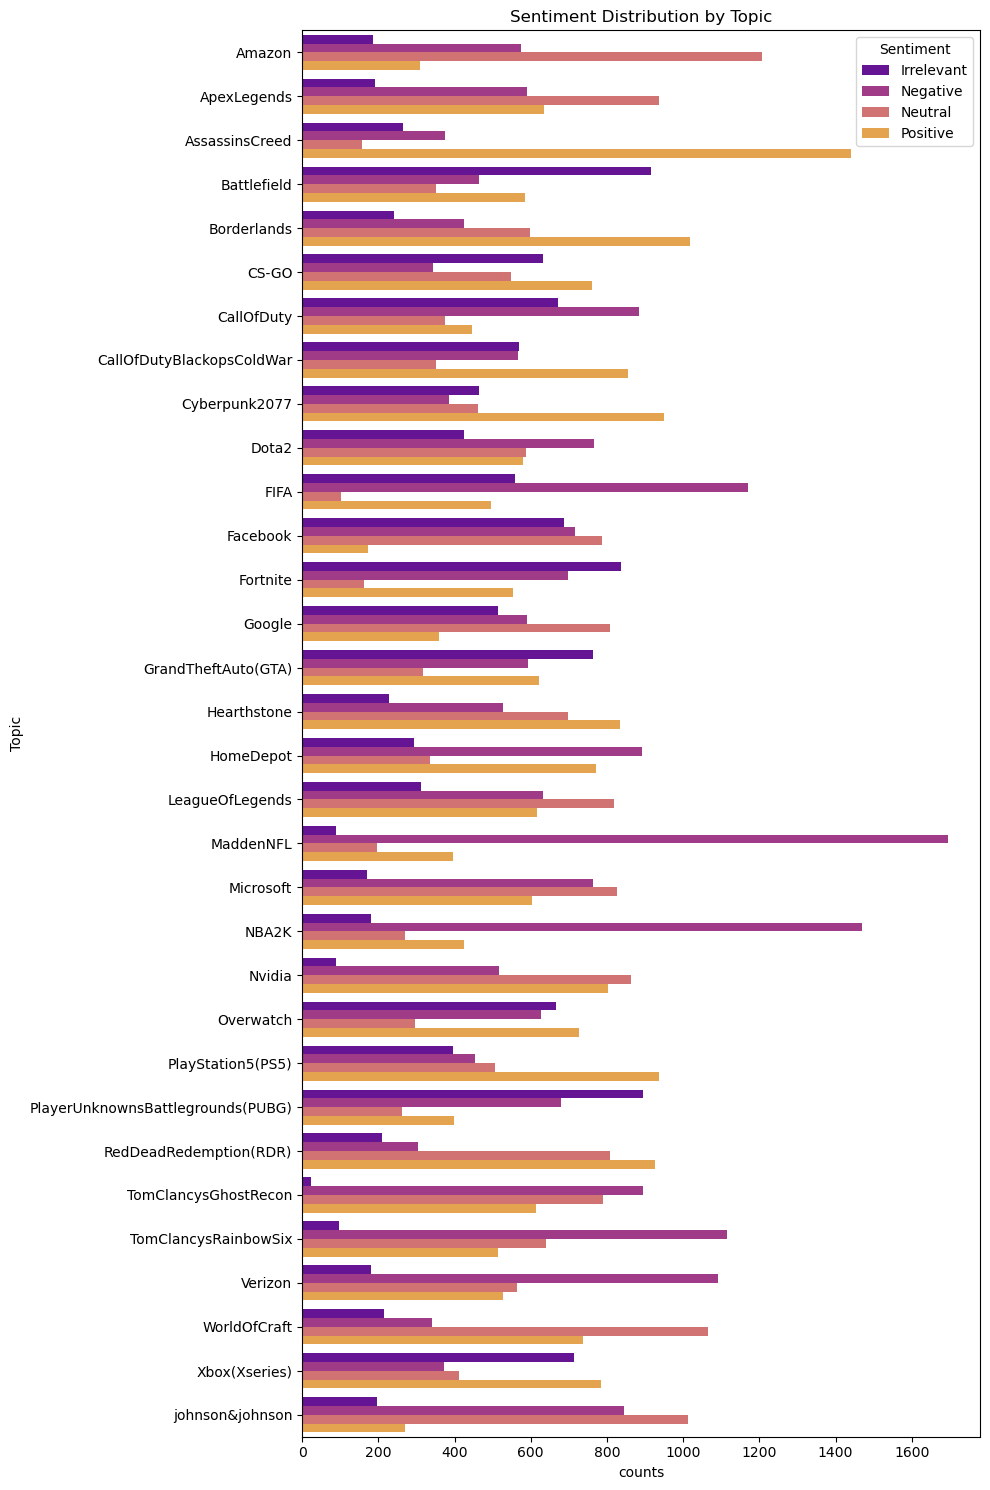

In [56]:
# Plotting sentiment distribution for each topic 
plt.figure(figsize=(10,15))
sns.barplot(y='Topic', x='counts', hue='Sentiment', data=sc,palette='plasma', orient='h')
plt.title('Sentiment Distribution by Topic')
plt.tight_layout()
plt.show()

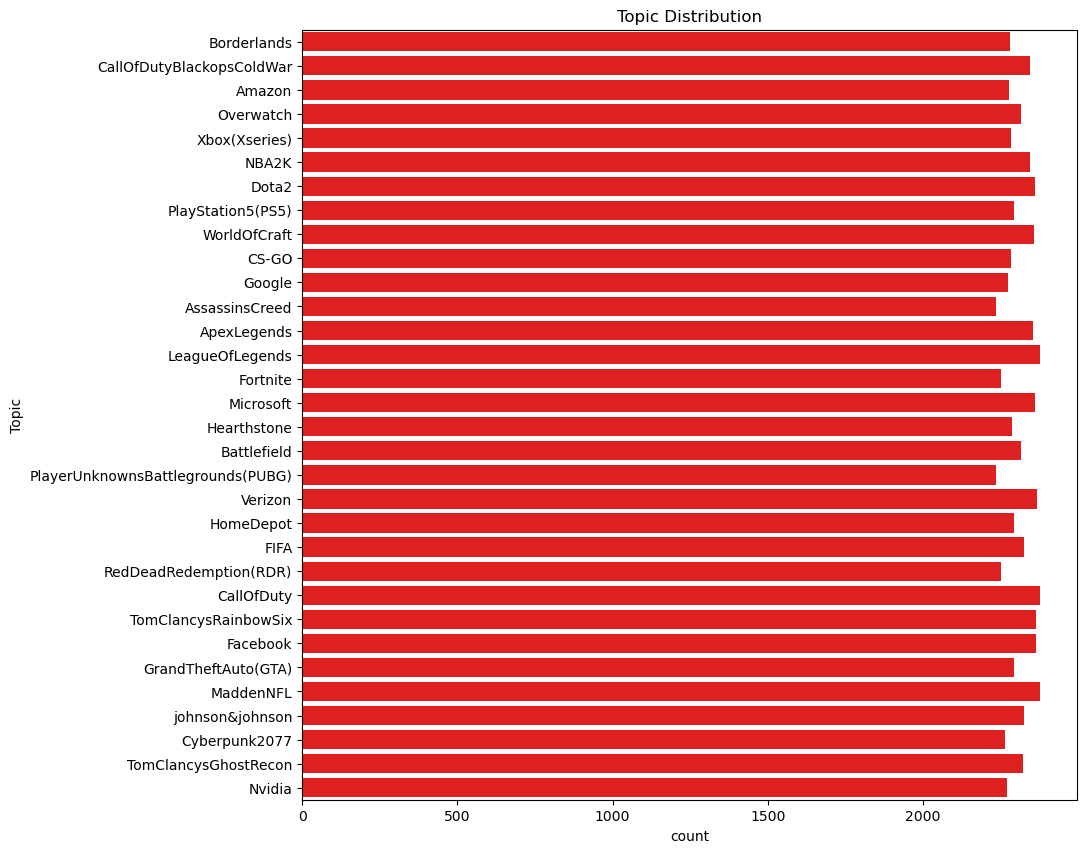

In [54]:
# visualization for Topic distribution
plt.figure(figsize=(10,10))
sns.countplot(y='Topic',data=df,color='r')
plt.title("Topic Distribution")
plt.show()


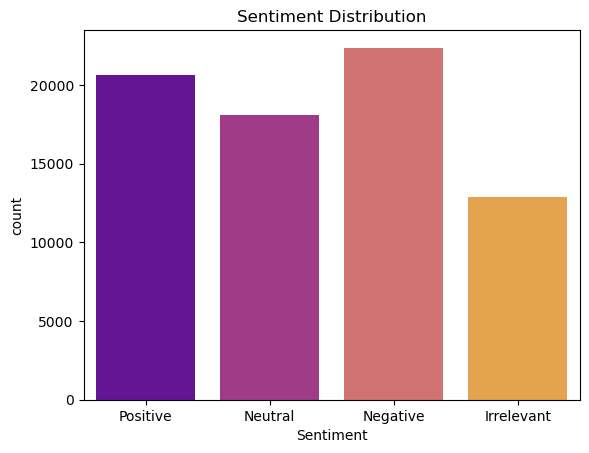

In [55]:
#Barplot for sentiment Distribution
sns.countplot(x='Sentiment',data=df,palette='plasma')
plt.title("Sentiment Distribution")
plt.show()


In [41]:
# Select top 5 topics
tc=df['Topic'].value_counts().nlargest(5).index
top= sc[sc['Topic'].isin(tc)]

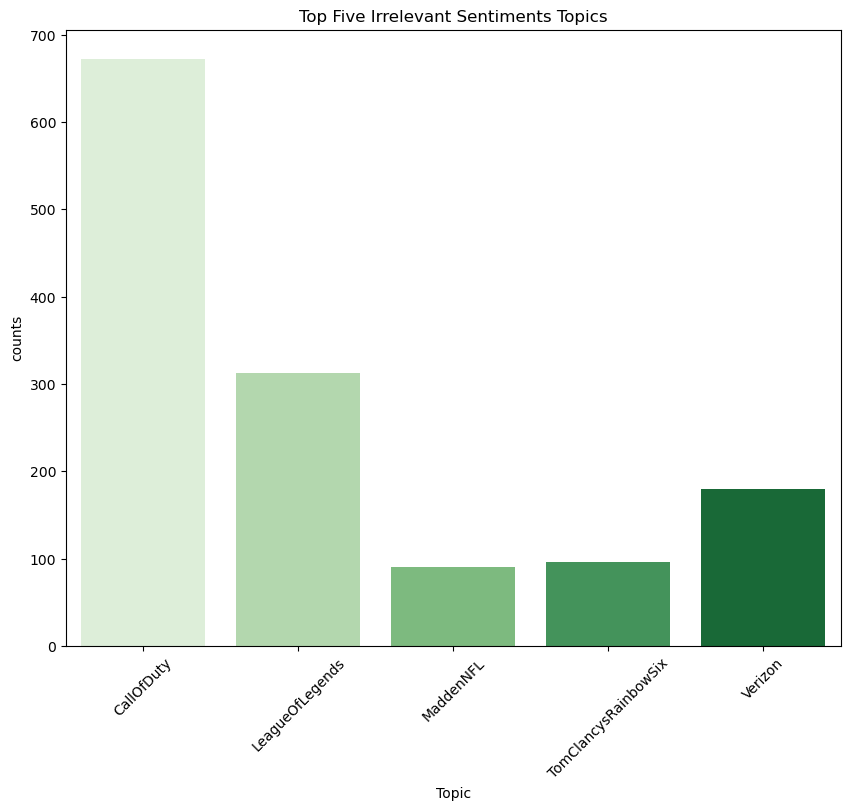

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y="counts",data=top[top["Sentiment"]=="Irrelevant"],palette='Greens')
plt.title("Top Five Irrelevant Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

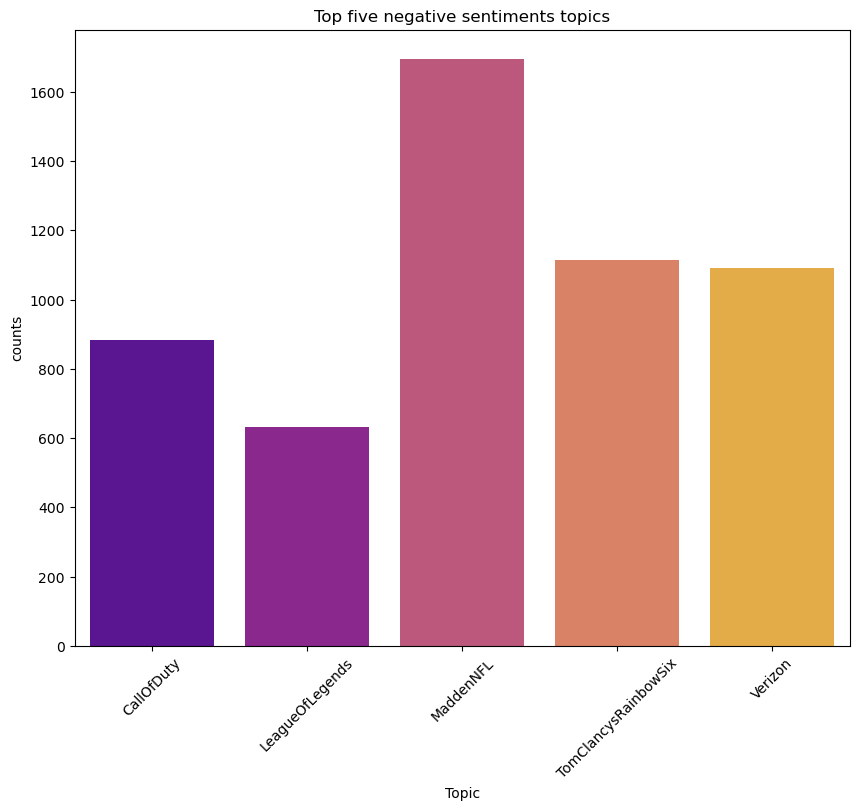

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='Topic',y='counts',data=top[top["Sentiment"]=='Negative'],palette='plasma')
plt.xticks(rotation=45)
plt.title("Top five negative sentiments topics")
plt.show()

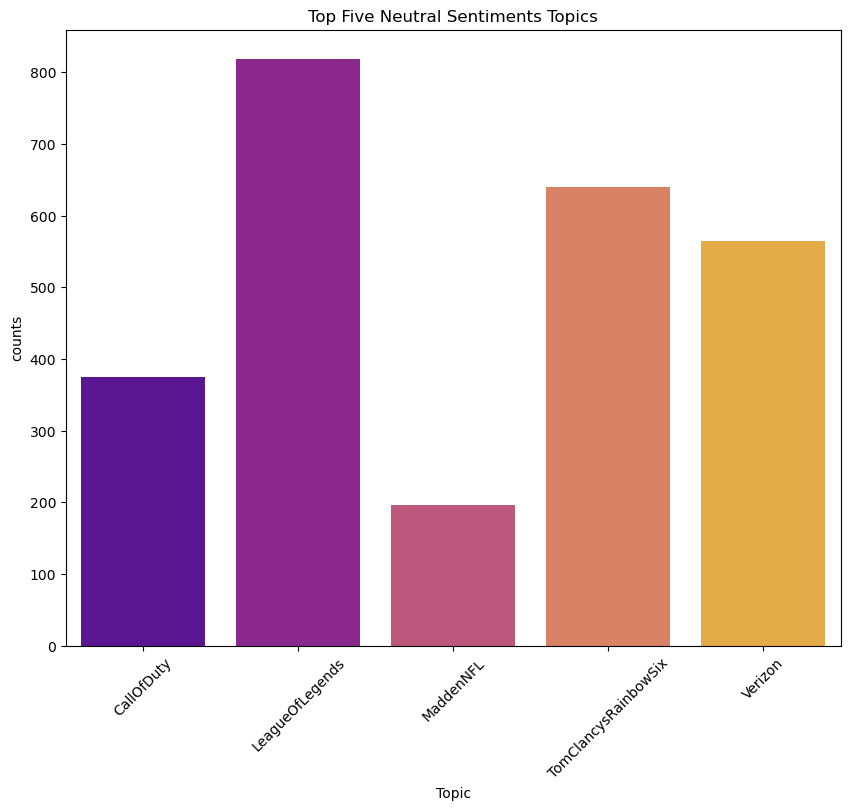

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y="counts",data=top[top["Sentiment"]=="Neutral"],palette='plasma')
plt.title("Top Five Neutral Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

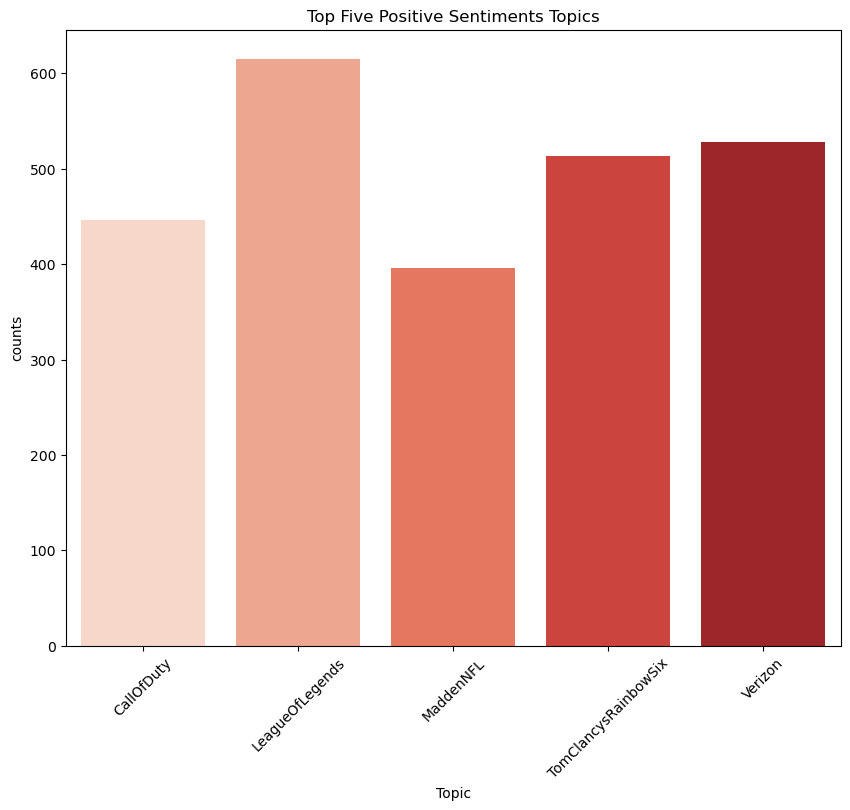

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y='counts',data=top[top["Sentiment"]=='Positive'],palette="Reds")
plt.title("Top Five Positive Sentiments Topics")
plt.xticks(rotation=45)
plt.show()


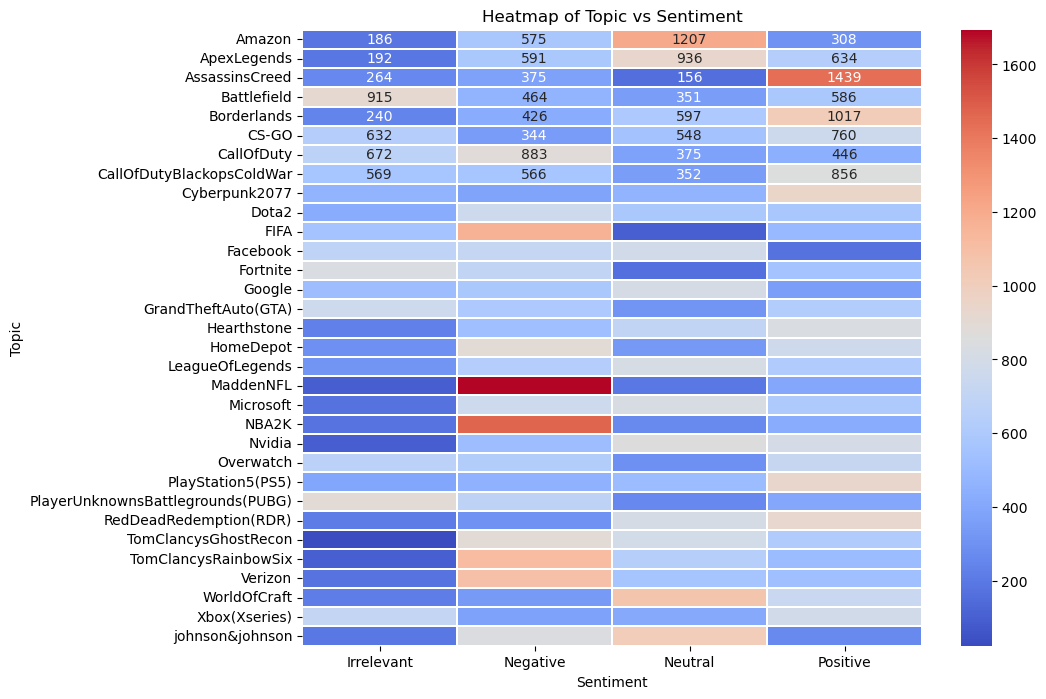

In [46]:
# Create the crosstab for categorical variables
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

plt.figure(figsize=(10,8))
sns.heatmap(crosstab,cmap='coolwarm',annot=True, fmt='d', linewidths=.1)
plt.title('Heatmap of Topic vs Sentiment')
plt.show()

In [47]:

pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/300.2 kB 440.4 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 438.9 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 602.4 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 525.1 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/300.2 kB 619.5 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/300.2 kB 624.4 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/300.2 kB 656.4 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 681.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 681.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 681.0 kB/s eta 0:00:01
   -------------------------------------  297.0/

In [48]:
from wordcloud import WordCloud

# Generate word clouds
pst_text = ' '.join(df[df['Sentiment'] == 'Positive']['Tweet'])
neg_text = ' '.join(df[df['Sentiment'] == 'Negative']['Tweet'])
neu_text = ' '.join(df[df['Sentiment'] == 'Neutral']['Tweet'])
irr_text = ' '.join(df[df["Sentiment"]== 'Irrelevant']['Tweet'])

In [49]:
# Create word clouds
wc_pst = WordCloud(width=800, height=400).generate(pst_text)
wc_neg = WordCloud(width=800, height=400).generate(neg_text)
wc_neu = WordCloud(width=800, height=400).generate(neu_text)
wc_irr = WordCloud(width=800, height= 400).generate(irr_text)

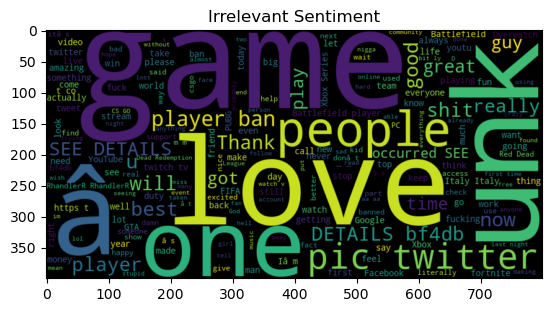

In [53]:
# For Irrelevant Sentiment
plt.imshow(wc_irr,interpolation='bilinear')
plt.title('Irrelevant Sentiment')
plt.show()

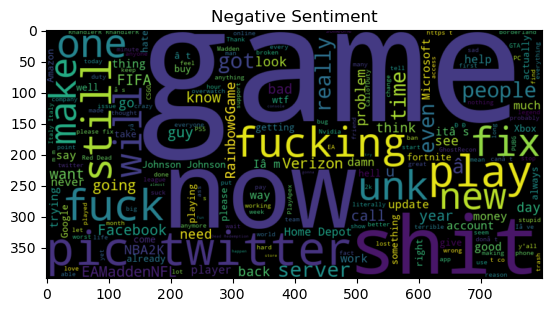

In [51]:
# For negative sentiment
plt.imshow(wc_neg,interpolation='bilinear')
plt.title('Negative Sentiment')
plt.show()

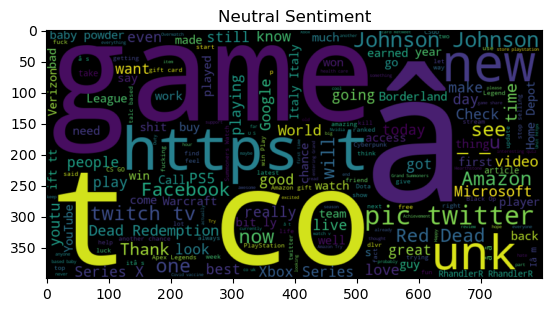

In [52]:
# For neutral sentiment
plt.imshow(wc_neu,interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.show()

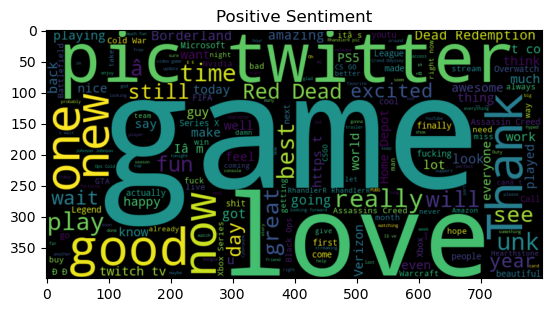

In [50]:
# For positive Sentiment
plt.imshow(wc_pst, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.show()